# CSCI5622 HW1 Fall 2017
# Brian McKean


# 1. K-nearest Neighbor (40pts)
In this homework you’ll implement a k-Nearest Neighbor classification framework to take a drawing of a number and output what number it corresponds to.

## 1.1 Programming questions (30 pts)
Finish knn.py to achieve the following goals. You can use tests.py to test your code.

1. Store necessary data in the constructor so you can do classification later
2. Modify the majority function so that it returns the value associated with the most indices.
3. Modify the classify function so that it finds the closest indicies to the query point.
4. Modify the confusion matrix function to classify examples and record which number it got right.

    -- See program

## 1.2 Analysis (5 points)

1. What is the role of the number of training instances to accuracy (hint: try different “--limit” and plot accuracy vs. number of training instances)?

    More training instances used increases accuracy of predictions


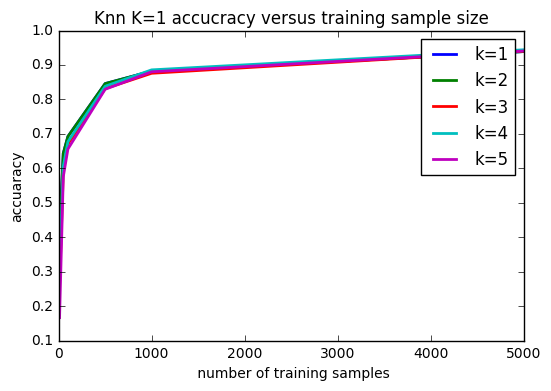

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1,1,1) # two rows, one column, first plot
## With k = 1

instances = [10, 50, 100, 500, 1000, 5000]
accuracy = [0.4101, 0.6433, 0.6923, 0.8458, 0.882, 0.9388]

acc2 =   [0.4101, 0.6433, 0.6923, 0.8458, 0.882, 0.9388]
acc3 =  [0.2553, 0.5895, 0.67, 0.8311, 0.8758, 0.9401]
acc4 = [0.3165, 0.6052, 0.6771, 0.838, 0.8857, 0.944]
acc5 =  [0.1664, 0.5753, 0.6559, 0.8293, 0.8801, 0.9404]

line, = ax.plot( instances, accuracy, lw=2, label='k=1')
line2, = ax.plot( instances, acc2, lw=2, label='k=2')
line3, = ax.plot( instances, acc3, lw=2, label='k=3')
line4, = ax.plot( instances, acc4, lw=2, label='k=4')
line5, = ax.plot( instances, acc5, lw=2, label='k=5')
ax.set_title("Knn K=1 accucracy versus training sample size")
ax.set_ylabel("accuaracy")
ax.set_xlabel(" number of training samples")
plt.legend()
plt.show()


2. What numbers get confused with each other most easily?

~~~
    
    Confusion Matirx
    K=3, limit=5000

      0     1     2     3     4     5     6     7     8     9
------------------------------------------------------------------------------------------
0:    973   1     2     2     0     3     6     3     0     1
1:    0     1056  4     1     1     0     0     1     1     0
2:    9     20    910   10    2     3     4     23    6     3
3:    1     1     9     977   1     23    0     4     9     5
4:    0     19    1     0     895   1     5     6     1     55
5:    4     6     1     30    3     834   25    2     5     5
6:    8     1     1     0     2     4     951   0     0     0
7:    0     16    3     0     5     0     0     1045  0     21
8:    5     26    3     27    6     27    10    14    871   20
9:    5     5     0     9     17    8     0     26    2     889
Accuracy: 0.940100


~~~


    Numbers most often confused below --> 20 or more wrong predictions
    Most confusion was 9,4 with 55+17 = 72 wrong
    
```
    2,1
    8,1
    5,3
    8,3
    8,5
    6,5
    7,2
    7,9
    9,4
    9,7
    9,8
```

3. What is the role of k to training accuracy?

```
(csci) apples-MacBook-Pro:hw1 brianmckean$ time python knn.py 
1 [10, 50, 100, 500, 1000, 5000] [0.4101, 0.6433, 0.6923, 0.8458, 0.882, 0.9388]
2 [10, 50, 100, 500, 1000, 5000] [0.4101, 0.6433, 0.6923, 0.8458, 0.882, 0.9388]
3 [10, 50, 100, 500, 1000, 5000] [0.2553, 0.5895, 0.67, 0.8311, 0.8758, 0.9401]
4 [10, 50, 100, 500, 1000, 5000] [0.3165, 0.6052, 0.6771, 0.838, 0.8857, 0.944]
5 [10, 50, 100, 500, 1000, 5000] [0.1664, 0.5753, 0.6559, 0.8293, 0.8801, 0.9404]
6 [10, 50, 100, 500, 1000, 5000] [0.2251, 0.559, 0.646, 0.8302, 0.8814, 0.94]
7 [10, 50, 100, 500, 1000, 5000] [0.1397, 0.5318, 0.6365, 0.8186, 0.8733, 0.9367]
8 [10, 50, 100, 500, 1000, 5000] [0.1217, 0.5066, 0.6286, 0.8151, 0.8743, 0.9377]
9 [10, 50, 100, 500, 1000, 5000] [0.1139, 0.4869, 0.6151, 0.8094, 0.8702, 0.9353]
10 [10, 50, 100, 500, 1000, 5000] [0.1064, 0.4785, 0.6066, 0.8071, 0.8671, 0.9353]



    Accuracy for chosen best k=4 and limit=5000 with accuracy of 
    For limit of 500 the next k=1 with accuuraacy of .8458
    There is some dependence on tie-breaking algorithm in classifier.
    These results were obtained withthis tie-breaker
        1. If tie of odd number --> take median number
        2. if tie is even number --> take first number

```

    K=4 has best accuacy.  As K increases after 4 accuracy goes down somewhat

4. In general, does a small value for k cause “overfitting” or “underfitting”?

    In general a small k leads to overfitting. You only match against one sample.

# 2 Cross Validation (30pts)
In practice, we usually use cross validation to find the best hyperparameter (k in k−nearest neigh- bor). In this part of homework, we will implement cross validation to evaluate the best parameter on the training data. Specifically, we split the training randomly into K folds. For a parameter k, for each i = 1,...,K, we use the i-th fold to evaluate the performance of the classifier from the other K − 1 folds. We then average the performance across all K folds.
## 2.1 Programming questions (20pts)
Finish cross validation.py to conduct K-fold cross-validation on the MNIST data and find the best k ∈ {1, 3, 5, 7, 9}. Since the cross validation can get slow, run it with “--limit 500” and “--limit 5000”.

-- See code

## 2.2 Analysis (10pts)

    ```
    
    (csci) apples-MacBook-Pro:hw1 brianmckean$ python  cross_validation.py --limit 500
    1-nearest neighber accuracy: 0.854000
    3-nearest neighber accuracy: 0.846000
    5-nearest neighber accuracy: 0.852000
    7-nearest neighber accuracy: 0.828000
    9-nearest neighber accuracy: 0.828000
    Accuracy for chosen best k= 1: 0.845800
    
    (csci) apples-MacBook-Pro:hw1 brianmckean$ python  cross_validation.py --limit 5000
    1-nearest neighber accuracy: 0.938800
    3-nearest neighber accuracy: 0.939200
    5-nearest neighber accuracy: 0.936400
    7-nearest neighber accuracy: 0.932800
    9-nearest neighber accuracy: 0.931800
    Accuracy for chosen best k= 3: 0.940100
    
    ```

1. What is the best k chosen from 5-fold cross validation with “--limit 500”? 

        k=1

2. What is the best k chosen from 5-fold cross validation “--limit 5000”?

        k=3


3. Is the best k consistent with the best performance k in problem 1?
        The corss validation shows a better k=3.
        It's not a huge difference, but it is a difference.
        
        The accuracy changed with this function to break ties in classification.
        When I accidently used np.mean() then k was the same

## 3. Bias-variance tradeoff (20pts)
Derive the bias-variance decomposition for k-NN regression in class. Specifically, assuming the training set is fixed S = {(x1, y1), . . . , (xn, yn)}, where the data are generated from the following process 

Given:
$ y = f(x) + \epsilon $

$ E(\epsilon)=0 $

$ Var(\epsilon) = \sigma_{\epsilon}^2 $

$ Err(x_{0}) = E[(y_{0}) - h_{s}(x_{0}))^2] $

Prove:

$ Err(x_{0}) = \sigma_{\epsilon}^2 + [f(x_{0}) - \frac{1}{k}\sum_{l=1}^{k}f(x_{(l)})]^2 + \frac{\sigma_{\epsilon}^2}{k} $


proof:

Given:

$ y = f(x) + \epsilon $

$ E(\epsilon)=0 $

$ Var(\epsilon) = \sigma_{\epsilon}^2 $

$ Err(x_{0}) = E[(y_{0}) - h_{s}(x_{0}))^2] $

Prove:

$ Err(x_{0}) = \sigma_{\epsilon}^2 + [f(x_{0}) - \frac{1}{k}\sum_{l=1}^{k}]f(x_{(l)})]^2 + \frac{\sigma_{\epsilon}^2}{k} $

Proof:

$ Err(x ) = E[ y^2] - 2E[y]E[h_{s}(x)] + E[(h_{s}(x))^2] $

$ E[y] = E[f(x) + \epsilon] = E[f(x) + E(\epsilon)] = f(x)
$


$ E[y^2] = Var[y] + (E[y])^2  
= \sigma^2 + f(x)^2
$

$ 2E[y]E[h_{s}(x)] = 2f(x)E[\frac{1}{k}\sum_{l=1}^{k}f(x_{l})] = 2f(x)\frac{1}{k}\sum_{l=1}^{k}f(x_{l})$

$
E[(h_{s}(x))^2] = Var(h_{s}(x)) + (E[h_{s}(x)])^2
$

$
Var(h_{s}(x)) = Var (\frac{1}{k}\sum_{l=1}^{k}Y_{l} )
$

$
= \frac{1}{k^2}\sum_{l=1}^{k}Var(f(x_{l})+Var(\epsilon_{l}) 
$

$
= \frac{1}{k^2}\sum_{l=1}^{k}Var(\epsilon_{l}) 
$

$
=k\sigma^2/k^2 = \sigma^2/k
$

$
(E[h_{s}(x)])^2 = (\frac{1}{k}\sum_{l=1}^{k}(f(x_{l})) ^2
$​​ 

$
Err(x) = \sigma^2 + f(x)^2 - 2f(x)\frac{1}{k}\sum_{l=1}^{k}f(x_{l}) + (\frac{1}{k}\sum_{l=1}^{k}Var(f(x_{l})) ^2 + \sigma^2/k
$

$
Err(x) = \sigma^2 + (f(x)^2 -  \frac{1}{k}\sum_{l=1}^{k}Var(f(x_{l}))^2 + \sigma^2/k
$

$
Err(x_{0}) = \sigma^2 + (f(x_{0})^2 -  \frac{1}{k}\sum_{l=1}^{k}Var(f(x_{l}))^2 + \sigma^2/k
$



## 4. Syllabus quiz (5pts)

Read the syllabus (https://chenhaot.com/courses/csci5622/2017fa/syllabus.html) 
and the final project assignment (https://chenhaot.com/courses/csci5622/2017fa/final-project.html). 

Finish this online quiz: https://goo.gl/forms/Cpn8oIB5GMBBAFmc2

-- Submitted